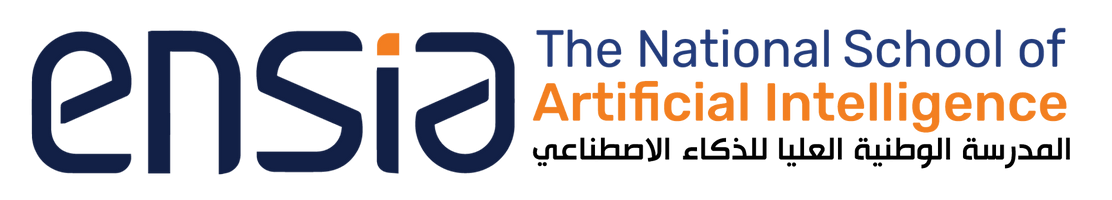

---
# **Introduction to Artificial Intelligence**

> ## Lab 5 (Week 6) --Search Algorithms: Part 1--
*Problem Formulation and Uninformed Search*

## Objectives
> - Using OOP to **formulate** the given problem according to the *5 aspects* seen in CHAPTER 3.
- Implementation of the **uninformed** search strategies using the `Graph Search General` algorithm.

## Overview:
>The aim of this lab is to implement the graph search general procedure outlined in Algorithm 1. The idea is to have a powerful general algorithm able to receive a problem and specified strategy as inputs for solving the given problem and produce a solution to the problem. The algorithm dynamically determines the appropriate data structure (LIFO, etc.) based on the specified strategy.

---
## **1. Problem Formulation**
---

> Two distinct problems will be explored: The 8-puzzle and Travel planning. For the 8-puzzle problem, a corresponding Python class is provided with its core attributes and methods (`EightPuzzle`). This class is represented according to the standard formulation principle (5 aspects: **initial_state**, **goal_test** **State_transition_model**, **actions** and **path_cost**).

> Additionally, a `Node` class is provided (You need to complete only two dunder methods) to facilitate the representation of the problem through a graph architecture. As explained in *CHAPTER 3*, a node represents a **specific state** within the given problem.

> ### Node representation


In [ ]:
class Node:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost

        if parent is None: #root node
            self.depth = 0
        else:
            self.depth = parent.depth + 1

    def __hash__(self):
        ...#TODO: What does this method do ?

    def __eq__(self, other):
        ...#TODO: Which attibutes should we use when comparing nodes objects ?

> ### The EightPuzzle Class

In [ ]:
class EightPuzzle:
    def __init__(self, initial_state, goal_state, state_transition_model,path_cost=0,actions=""):
        self.state = initial_state
        self.goal_state = goal_state
        self.state_transition_model = state_transition_model
        self.actions=actions
        self.path_cost=path_cost

    def is_goal(self, current_state):
        return current_state == self.goal_state
#         return all(row1 == row2 for row1, row2 in zip(goal_test, self.goal_test)) and len(goal_test) == len(self.goal_test)

    def find_empty_position(self, state):
        for i, row in enumerate(state):
            for j, cell in enumerate(row):
                if cell == 0:
                    return i, j

    def get_valid_actions(self, state):
        valid_actions = []
        empty_position=self.find_empty_position(state)
        for action, move_info in self.state_transition_model.items():
            new_position = [empty_position[0] + move_info[0], empty_position[1] + move_info[1]]
            if self.is_valid_position(new_position):
                valid_actions.append(action)
        return valid_actions

    def is_valid_position(self, position):
        row, col = position
        return 0 <= row < len(self.state) and 0 <= col < len(self.state[0])


    def apply_action(self, state, action):
        empty_row, empty_col = self.find_empty_position(state)
        new_state = copy.deepcopy(state)
#         new_state = [list(row) for row in state]

        if action == "up":
            new_state[empty_row][empty_col], new_state[empty_row - 1][empty_col] = new_state[empty_row - 1][empty_col], new_state[empty_row][empty_col]
        elif action == "down":
            new_state[empty_row][empty_col], new_state[empty_row + 1][empty_col] = new_state[empty_row + 1][empty_col], new_state[empty_row][empty_col]
        elif action == "left":
            new_state[empty_row][empty_col], new_state[empty_row][empty_col - 1] = new_state[empty_row][empty_col - 1], new_state[empty_row][empty_col]
        elif action == "right":
            new_state[empty_row][empty_col], new_state[empty_row][empty_col + 1] = new_state[empty_row][empty_col + 1], new_state[empty_row][empty_col]

        return new_state

    def shuffle(self,num):
        for _ in range(0,num):
            actions = self.get_valid_actions(self.state)
            #randomly choose one of the four moves
            self.state = self.apply_action(self.state,choice(actions))

    def expand_node(self, node):
        state = node.state
        valid_actions = self.get_valid_actions(state)
        child_nodes = []
        for action in valid_actions:
            child_state = self.apply_action(state, action)
            child_node = Node(child_state, parent=node, action=action, cost=node.cost + 1)
            child_nodes.append(child_node)
        return child_nodes

    def printNode(self,message,node):
        print ("Action = ",end=" ")
        print(node.action,end=" ")
        print(message,end=" ")
        print(node.state)

> ### TravelPlanProblem


In [ ]:
import queue
import copy
from random import choice

class TravelPlanProblem:
    def __init__(self, initial_state, goal_test, state_transition_model,path_cost=0,actions=""):
        ... #TODO: Initialize with the appropriate attributes

    ...#TODO: Fill with the appropriate methods, Bear in mind that you adhere to the formulation standards
       #  in a way that the general search algorithm could search both problems without the need to change its core.

    def printNode(self,message,node):
        print ("Action = ",end=" ")
        print(node.action,end=" ")
        print(message,end=" ")
        print(node.state)


---
## **2. Search Algorithm**
---

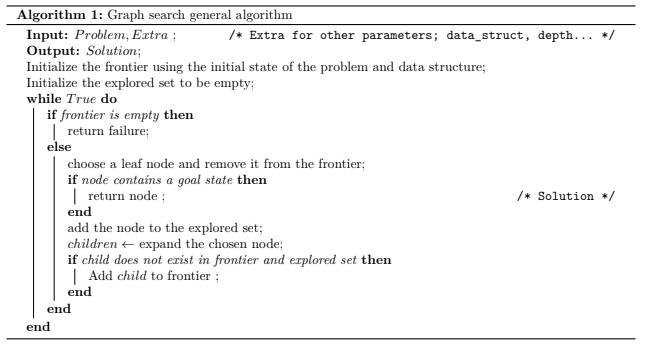

In [ ]:
#Your code here
class GeneralSearch:
    def __init__(self, problem,search_strategy="breadth_first"):
      pass

    ...# TODO: Fill with the appropriate methods.


---
## **3. Your Tasks:**
>1. Coding Part:
  - Create the Graph Search General Algorithm according to the given peudo-code.
  - Fill in the missing parts in the given `Node` class.
  - Create a class that gives the well-formulated Travel planning problem.

> 2. Testing part:
  - Create the different Objects needed for testing both problems.
  - Using the same Graph Search General object, Solve both problems using Breadth First Search and Depth First Search.
  
***
- What do you notice in terms of Execution time and accuracy ?
****
---

**Hint:**
>Keep in mind that the Breadth-First Search(BFS) and Depth-First Search(DFS) strategies primarily differ in the data structure employed (FIFO. . .) for exploring frontier nodes (leaf nodes). Certain versions of the Depth-First Search method might involve additional parameters such as depth limit.
Perhaps you should create customized data structures that utilize consistent methods, such as ”push” for addition and ”pop” for removal, to perform specific tasks uniformly, ensuring the general search algorithm remains truly GENERAL 🤔! (or search for a library that already did that 🙃).

---
Ready for testing 🙃?
---

In [ ]:
from copy import deepcopy

def get_solution_path(solution_node):
    path = []
    while solution_node:
        path.insert(0, solution_node.state)
        solution_node = solution_node.parent
    return path

initial_city = "Algiers"
goal_city = "Guelma"
state_transition_model = {
    'Adrar': {'Tindouf': 610, 'Bechar': 540, 'El Bayadh': 790, 'Laghouat': 840, 'Ghardaia': 690, 'Tamanrasset': 1280},
    'Chlef': {'Mostaganem': 110, 'Relizane': 95, 'Biskra': 340, 'Tissemsilt': 70, 'Ain Defla': 55, 'Tipaza': 85},
    'Laghouat': {'El Bayadh': 220, 'Ghardaia': 250, 'Djelfa': 160, 'Tiaret': 240},
    'Oum El Bouaghi': {'Batna': 75, 'Khenchela': 90, 'Tbessa': 200, 'Souk Ahras': 180, 'Guelma': 130, 'Constantine': 110, 'Mila': 95},
    'Batna': {"MSila": 160, 'Biskra': 120, 'Khenchela': 80, 'Oum El Bouaghi': 75, 'Mila': 140, 'Setif': 130},
    'Bejaia': {'Tizi Ouzou': 60, 'Bouira': 110, 'Bordj Bou Arreridj': 140, 'Setif': 90, 'Jijel': 70},
    'Biskra': {'Djelfa': 180, "MSila": 150, 'Batna': 120, 'Khenchela': 160, 'El Oued': 210, 'Ouargla': 280},
    'Bechar': {'Naama': 320, 'El Bayadh': 470, 'Adrar': 540, 'Tindouf': 610},
    'Blida': {'Tipaza': 45, 'Alger': 35, 'Bouira': 65, 'Medea': 55, 'Ain Defla': 40},
    'Bouira': {'Medea': 80, 'Blida': 65, 'Boumerdes': 70, 'Tizi Ouzou': 50, 'Bordj Bou Arreridj': 90, "MSila": 110},
    'Tamanrasset': {'Adrar': 1280, 'Ghardaia': 960, 'Ouargla': 820, 'Illizi': 950},
    'Tbessa': {'El Oued': 250, 'Khenchela': 200, 'Oum El Bouaghi': 180, 'Souk Ahras': 150},
    'Tlemcen': {'Ain Temouchent': 70, 'Sidi Bel Abbes': 90, 'Naama': 160},
    'Tiaret': {'El Bayadh': 240, 'Saefda': 180, 'Mascara': 140, 'Relizane': 120, 'Tissemsilt': 90, 'Djelfa': 160, 'Laghouat': 240},
    'Tizi Ouzou': {'Bouira': 50, 'Boumerdes': 70, 'Bejaia': 60},
    'Algiers': {'Blida': 35, 'Tipaza': 45, 'Boumerdes': 30},
    'Djelfa': {'Laghouat': 160, 'Tiaret': 160, 'Tissemsilt': 130, 'Medea': 110, "MSila": 120, 'Biskra': 180, 'Ouargla': 320, 'Ghardaia': 250},
    'Jijel': {'Mila': 110, 'Setif': 130, 'Bejaia': 70, 'Skikda': 90},
    'Setif': {'Batna': 130, "MSila": 90, 'Bordj Bou Arreridj': 70, 'Bejaia': 90, 'Jijel': 130, 'Mila': 80},
    'Saefda': {'El Bayadh': 180, 'Sidi Bel Abbes': 100, 'Mascara': 80, 'Tizi Ouzou': 160},
    'Skikda': {'Constantine': 80, 'Jijel': 90, 'Annaba': 110, 'Guelma': 140},
    'Sidi Bel Abbes': {'Naama': 160, 'Tlemcen': 90, 'Ain Temouchent': 70, 'Oran': 60, 'Mascara': 80, 'Saefda': 100, 'El Bayadh': 240},
    'Annaba': {'Guelma': 110, 'Skikda': 110, 'El Tarf': 60},
    'Guelma': {'Oum El Bouaghi': 130, 'Constantine': 110, 'Skikda': 140, 'Annaba': 110, 'El Tarf': 90, 'Souk Ahras': 120},
    'Constantine': {'Oum El Bouaghi': 110, 'Mila': 80, 'Jijel': 110, 'Skikda': 80, 'Guelma': 110},
    'Medea': {'Djelfa': 110, 'Tissemsilt': 90, 'Ain Defla': 40, 'Blida': 55, 'Bouira': 80, "MSila": 70},
    'Mostaganem': {'Oran': 60, 'Mascara': 50, 'Relizane': 40, 'Chlef': 110},
    "MSila": {'Djelfa': 120, 'Medea': 70, 'Bouira': 110, 'Bordj Bou Arreridj': 70, 'Setif': 90, 'Batna': 160, 'Biskra': 150},
    'Mascara': {'Saefda': 80, 'Sidi Bel Abbes': 80, 'Oran': 50, 'Mostaganem': 50, 'Relizane': 60, 'Tiaret': 140},
    'Ouargla': {'Ghardaia': 320, 'El Oued': 280, 'Illizi': 680, 'Tamanrasset': 820},
    'Oran': {'Ain Temouchent': 70, 'Sidi Bel Abbes': 60, 'Mascara': 50, 'Mostaganem': 60},
    'El Bayadh': {'Adrar': 790, 'Bechar': 470, 'Naama': 210, 'Sidi Bel Abbes': 240, 'Saefda': 180, 'Tiaret': 240, 'Laghouat': 220, 'Ghardaia': 250},
    'Illizi': {'Tamanrasset': 950, 'Ouargla': 680},
    'Bordj Bou Arreridj': {"MSila": 70, 'Bouira': 90, 'Bejaia': 140, 'Setif': 70},
    'Boumerdes': {'Blida': 30, 'Alger': 30, 'Tizi Ouzou': 70, 'Bouira': 70},
    'El Tarf': {'Souk Ahras': 90, 'Guelma': 90, 'Annaba': 60},
    'Tindouf': {'Bechar': 610, 'Adrar': 610},
    'Tissemsilt': {'Relizane': 40, 'Chlef': 70, 'Ain Defla': 90, 'Medea': 90, 'Djelfa': 130, 'Tiaret': 90},
    'El Oued': {'Ouargla': 280, 'Biskra': 210, 'Khenchela': 250, 'Tbessa': 250},
    'Khenchela': {'El Oued': 250, 'Biskra': 160, 'Batna': 80, 'Oum El Bouaghi': 90, 'Tbessa': 200},
    'Souk Ahras': {'Tbessa': 150, 'Oum El Bouaghi': 180, 'Guelma': 120, 'El Tarf': 90},
    'Tipaza': {'Ain Defla': 40, 'Chlef': 85, 'Alger': 45, 'Blida': 45},
    'Mila': {'Batna': 140, 'Setif': 80, 'Jijel': 110, 'Constantine': 80, 'Oum El Bouaghi': 95},
    'Ain Defla': {'Tissemsilt': 90, 'Chlef': 55, 'Tipaza': 40, 'Blida': 40, 'Medea': 40},
    'Naama': {'Tlemcen': 160, 'Sidi Bel Abbes': 160, 'El Bayadh': 210, 'Bechar': 320},
    'Ain Temouchent': {'Tlemcen': 70, 'Sidi Bel Abbes': 70, 'Oran': 70},
    'Ghardaia': {'Adrar': 690, 'El Bayadh': 250, 'Laghouat': 250, 'Djelfa': 250, 'Ouargla': 320, 'Tamanrasset': 960},
    'Relizane': {'Mascara': 60, 'Mostaganem': 40, 'Chlef': 95, 'Tissemsilt': 40, 'Tiaret': 120}
}


travel_plan_problem = TravelPlanProblem(initial_city, goal_city, state_transition_model)
copy_travel_plan = deepcopy(travel_plan_problem)
# Perform search with breadth-first strategy
solution_node_breadth_first = GeneralSearch(travel_plan_problem,search_strategy="breadth_first").search()
print("---------------------------------------------------------------------------")
print("------------------------------------BFS------------------------------------")
print("---------------------------------------------------------------------------")

print("Solution Path (Breadth-First):", get_solution_path(solution_node_breadth_first))
print("Solution Cost Path (Breadth-First):", travel_plan_problem.path_cost)
print("---------------------------------------------------------------------------")
print("------------------------------------DFS------------------------------------")
print("---------------------------------------------------------------------------")
solution_node_depth_first = GeneralSearch(copy_travel_plan,search_strategy="depth_first").search()
print("Solution Path (Depth-First):", get_solution_path(solution_node_depth_first))
print("Solution Cost Path (Depth-First):", copy_travel_plan.path_cost)

> ### Test 8-puzzle

In [ ]:
initial_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
goal_test = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
state_transition_model = {
    "up":  [-1, 0],
    "down":  [1, 0],
    "left": [0, -1],
    "right":  [0, 1]}

eight_puzzle_instance = EightPuzzle(initial_state, goal_test, state_transition_model)
eight_puzzle_instance.shuffle(3)

eight_puzzle_instance_copy = deepcopy(eight_puzzle_instance)

print(eight_puzzle_instance.state)
solution_node_breadth_first = GeneralSearch(eight_puzzle_instance,search_strategy="breadth_first").search(max_depth = 10)
print("--------------------------------------------------------------------------")
print("************************************BFS***********************************")
print("--------------------------------------------------------------------------")
print("Solution Path (Breadth-First):", get_solution_path(solution_node_breadth_first))
print("Solution Cost Path (Breadth-First):", eight_puzzle_instance.path_cost)
print("--------------------------------------------------------------------------")
print("************************************DFS***********************************")
print("--------------------------------------------------------------------------")
print(eight_puzzle_instance_copy.state)
solution_node_depth_first = GeneralSearch(eight_puzzle_instance_copy,search_strategy="depth_first").search(max_depth = 10)
print("Solution Path (Depth-First):", get_solution_path(solution_node_depth_first))
print("Solution Cost Path (Depth-First):", eight_puzzle_instance_copy.path_cost)

